# DM-electron scattering rates showing the effect of changing $g(v_{\rm min},t)$

### First we look at how much the Sausage impacts the scattering rates.
Don't expect much at this point for Xenon since we are still only probing the tail whereas the Sausage modifies the shape of the whole distribution

In [15]:
import sys
sys.path.append('../erec')
from numpy import *
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from DMFuncs import *
from PlotFuncs import *
from HaloFuncs import *
from Params import *
from AtomicFuncs import *

nq = 40 # accuracy of q integral
ne = 100 # number of energies
nv = 1000 # number of v_mins

sigma_e = 1.0e-37 # cm^2
E_r_vals = logspace(-1.0,3.0,ne)/1000.0 # keV

# tabulate gmin
vmin = linspace(0.0,800.0,nv)
gmin_SHM = gvmin_Isotropic(vmin,v_LSR=SHM.RotationSpeed,sig=SHM.Dispersion,v_esc=SHM.EscapeSpeed)
gmin_Iso = gvmin_Isotropic(vmin)
gmin_Saus = gvmin_Triaxial(vmin)

nm = 2
m = [10.0,1000.0]

R0_H = zeros(shape=(ne,nm))
R0_L = zeros(shape=(ne,nm))
R1_H = zeros(shape=(ne,nm))
R1_L = zeros(shape=(ne,nm))
for mi in range(0,nm):
    R0_H[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_Iso,nq=nq)
    R0_L[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_Iso,nq=nq)
    R1_H[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_Saus,nq=nq)
    R1_L[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_Saus,nq=nq)
    


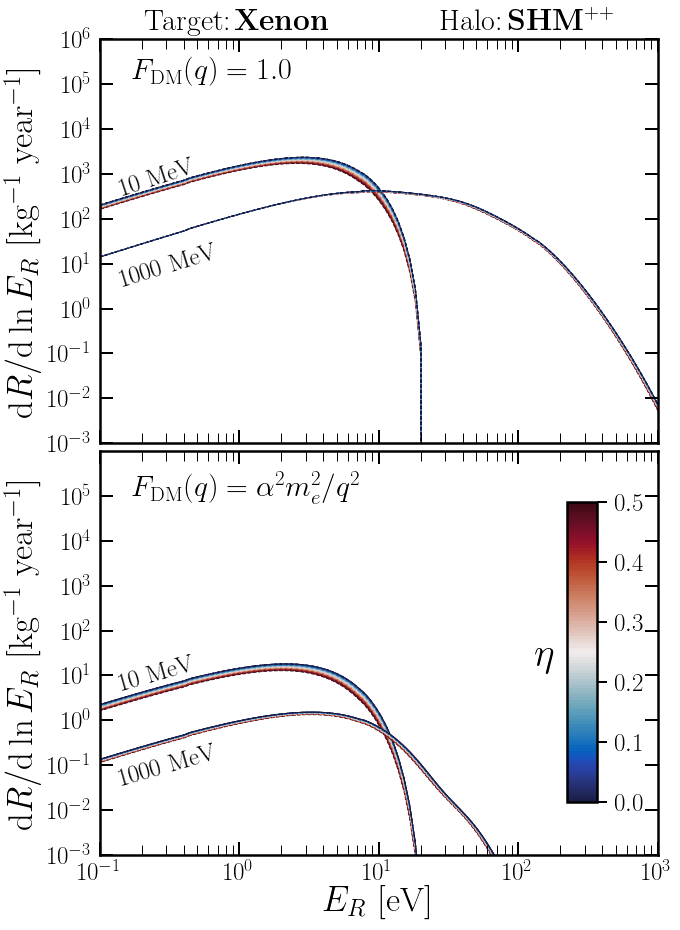

In [16]:
import cmocean

#####
# set up plot
hspace=0.02
lw=2.5
lfs=35
tfs=25
size_x=10
size_y=15

xlab2 = r'$E_R$ [eV]'
ylab2 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
ylab1 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
fig, axarr = plt.subplots(2, 1,figsize=(size_x,size_y))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=hspace)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.set_ylabel(ylab1,fontsize=lfs)
ax2.set_ylabel(ylab2,fontsize=lfs)
ax2.set_xlabel(xlab2,fontsize=lfs)
#####



# PLOT:
neta = 10
eta_vals = linspace(0.0,0.5,neta)
x = E_r_vals*1000.0 
col = cmocean.cm.balance(linspace(0,1,neta)) 
for mi in range(0,nm):
    y0_H = R0_H[:,mi]
    y0_L = R0_L[:,mi]
    for i in flipud(range(0,neta)):
        y_L = (1-eta_vals[i])*R0_L[:,mi] + eta_vals[i]*R1_L[:,mi]
        y_H = (1-eta_vals[i])*R0_H[:,mi] + eta_vals[i]*R1_H[:,mi]
        ax1.fill_between(x,y_H,y2=y0_H,linestyle='--',color=col[i,:],lw=1)
        ax2.fill_between(x,y_L,y2=y0_L,linestyle='--',color=col[i,:],lw=1,zorder=-1)

# Tweak ranges on show
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([0.1,1.0e3])
ax1.set_ylim([1.0e-3,1.0e6])
ax1.set_xticklabels([])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([0.1,1.0e3])
ax2.set_ylim([1.0e-3,1.0e6])
ax1.set_yticks(10.0**arange(-3,7))
ax2.set_yticks(10.0**arange(-3,6))

# Labels
plt.gcf().text(0.15,0.735,str(int(m[0]))+r' MeV',fontsize=25,rotation=18)
plt.gcf().text(0.15,0.65,str(int(m[1]))+r' MeV',fontsize=25,rotation=17)
plt.gcf().text(0.15,0.276,str(int(m[0]))+r' MeV',fontsize=25,rotation=16)
plt.gcf().text(0.15,0.188,str(int(m[1]))+r' MeV',fontsize=25,rotation=16)
plt.gcf().text(0.17,0.84,r'$F_{\rm DM}(q) = 1.0$',fontsize=30)
plt.gcf().text(0.17,0.45,r'$F_{\rm DM}(q) = \alpha^2 m^2_e/q^2$',fontsize=30)
ax1.set_title(r'Target:\,{\bf Xenon}\quad\quad\quad\quad Halo:\,{\bf SHM}$^{++}$',fontsize=30,pad=10)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax1, width="15%", height="30%", bbox_to_anchor=[400, -500, 200, 1000]) 
norm = mpl.colors.Normalize(vmin=0,vmax=eta_vals[-1])
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.balance, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=arange(0.0,eta_vals[-1]+0.1,0.1),boundaries=linspace(0.0,eta_vals[-1],100),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[3]
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.73,0.3,r'$\eta$',fontsize=40,color='k')


plt.show()
fig.savefig('../plots/DMRates_Xe_SHMpp.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/DMRates_Xe_SHMpp.png',bbox_inches='tight')


### Not a big effect, lets try some streams

# S1 and S2 streams

In [17]:
# tabulate gmin
gmin0 = (1-0.2)*gvmin_Isotropic(vmin) + 0.2*gvmin_Triaxial(vmin)
gmin_S1 = gvmin_Triaxial(vmin,v_shift=S1stream.Velocity,sig=S1stream.Dispersion,v_esc=1000.0)
gmin_S2 = gvmin_Triaxial(vmin,v_shift=S2stream.Velocity,sig=S1stream.Dispersion,v_esc=1000.0)

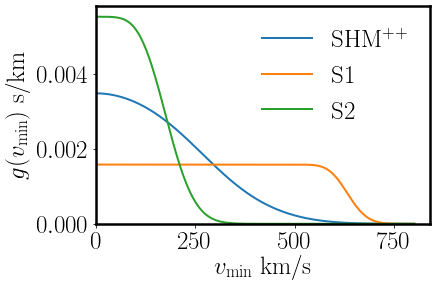

In [18]:
# Plot gmins just for safety
plt.plot(vmin,gmin0,'-',label='SHM$^{++}$',lw=2)
plt.plot(vmin,gmin_S1,'-',label='S1',lw=2)
plt.plot(vmin,gmin_S2,'-',label='S2',lw=2)
plt.ylabel(r'$g(v_{\rm min})$ s/km')
plt.xlabel(r'$v_{\rm min}$ km/s')
plt.legend(frameon=False)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [19]:
# Calculate rates

np = 20
nq = 20

R_L = zeros(shape=(ne,nm))
R_H = zeros(shape=(ne,nm))
R_L_S1 = zeros(shape=(ne,nm))
R_L_S2 = zeros(shape=(ne,nm))
R_H_S1 = zeros(shape=(ne,nm))
R_H_S2 = zeros(shape=(ne,nm))

for mi in range(0,nm):
    # SHMpp
    R_L[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin0,nq=nq)
    R_H[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin0,nq=nq)
    
    # S1
    R_L_S1[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S1,nq=nq)
    R_H_S1[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S1,nq=nq)
    
    # S2
    R_L_S2[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S2,nq=nq)
    R_H_S2[:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S2,nq=nq)


In [20]:
##### define plotting fucntion to use for either S1 or S2

def Streamplot(R_L_S,R_H_S):

    # set up plot
    hspace=0.02
    lw=2.5
    lfs=35
    tfs=25
    size_x=10
    size_y=15

    xlab2 = r'$E_R$ [eV]'
    ylab2 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
    ylab1 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
    plt.rcParams['axes.linewidth'] = lw
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif',size=tfs)
    fig, axarr = plt.subplots(2, 1,figsize=(size_x,size_y))
    gs = gridspec.GridSpec(2, 1)
    gs.update(hspace=hspace)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    ax2.set_xlabel(xlab2,fontsize=lfs)
    #####

    n_xi = 10
    xi_vals = linspace(0.0,1.0,n_xi)
    col1 = cmocean.cm.balance(linspace(0.0,1.0,n_xi))
    col2 = cmocean.cm.balance(linspace(0.0,1.0,n_xi))

    for mi in range(0,nm):
        y0_L = R_L[:,mi]
        y0_H = R_H[:,mi]
        for i in flipud(range(0,n_xi)):
            xi = xi_vals[i]
            y_L = (1-xi)*R_L[:,mi] + xi*R_L_S[:,mi]
            y_H = (1-xi)*R_H[:,mi] + xi*R_H_S[:,mi]
            ax1.fill_between(x,y_H,y2=y0_H,color=col2[i,:],alpha=0.5)
            ax2.fill_between(x,y_L,y2=y0_L,color=col2[i,:],alpha=0.5)
            
    # Tweak ranges on show
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim([0.1,1.0e3])
    ax1.set_ylim([1.0e-3,1.0e6])
    ax1.set_xticklabels([])
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlim([0.1,1.0e3])
    ax2.set_ylim([1.0e-3,1.0e6])
    ax1.set_yticks(10.0**arange(-3,7))
    ax2.set_yticks(10.0**arange(-3,6))


    plt.gcf().text(0.15,0.725,str(int(m[0]))+r' MeV',fontsize=25,rotation=18)
    plt.gcf().text(0.15,0.65,str(int(m[1]))+r' MeV',fontsize=25,rotation=17)
    plt.gcf().text(0.15,0.276,str(int(m[0]))+r' MeV',fontsize=25,rotation=16)
    plt.gcf().text(0.15,0.188,str(int(m[1]))+r' MeV',fontsize=25,rotation=16)
    plt.gcf().text(0.17,0.84,r'$F_{\rm DM}(q) = 1.0$',fontsize=30)
    plt.gcf().text(0.17,0.45,r'$F_{\rm DM}(q) = \alpha^2 m^2_e/q^2$',fontsize=30)

    # Custom colorbar
    import matplotlib as mpl
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    cbaxes = inset_axes(ax1, width="15%", height="30%", bbox_to_anchor=[400, -500, 200, 1000]) 
    norm = mpl.colors.Normalize(vmin=0,vmax=xi_vals[-1])
    sm = plt.cm.ScalarMappable(cmap=cmocean.cm.balance, norm=norm)
    sm.set_array([])
    plt.colorbar(sm,cax=cbaxes,ticks=arange(0.0,xi_vals[-1]+0.1,0.1),boundaries=linspace(0.0,xi_vals[-1],n_xi),orientation='vertical')
    f = plt.gcf().get_children()
    cbar = f[3]
    cbar.tick_params(labelsize=25) 
    cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
    cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
    plt.gcf().text(0.73,0.3,r'$\xi$',fontsize=40,color='k')
    return fig,ax1,ax2


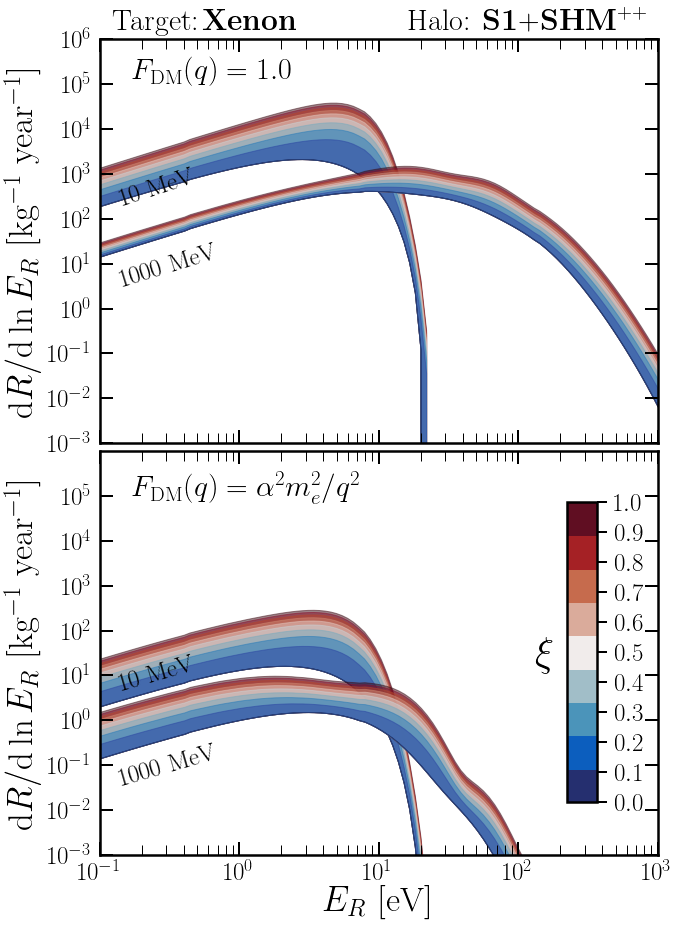

In [21]:
# Plot result for S1 stream
fig,ax1,ax2 = Streamplot(R_L_S1,R_H_S1)
ax1.set_title(r'Target:\,{\bf Xenon}\quad\quad\quad\quad Halo: {\bf S1}+{\bf SHM}$^{++}$',fontsize=30,pad=10)
plt.show()
fig.savefig('../plots/DMRates_Xe_S1.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/DMRates_Xe_S1.png',bbox_inches='tight')

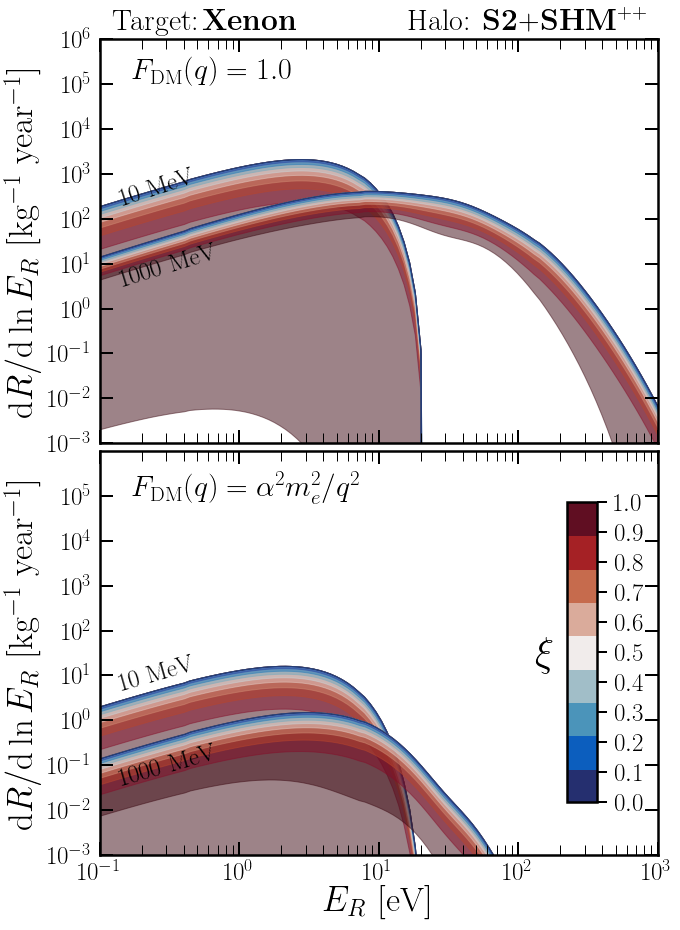

In [22]:
# Same plot but for S2
fig,ax1,ax2 = Streamplot(R_L_S2,R_H_S2)
ax1.set_title(r'Target:\,{\bf Xenon}\quad\quad\quad\quad Halo: {\bf S2}+{\bf SHM}$^{++}$',fontsize=30,pad=10)
plt.show()
fig.savefig('../plots/DMRates_Xe_S2.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/DMRates_Xe_S2.png',bbox_inches='tight')

## General trend is for S2 to weaken the rate and S1 to strengthen the rate, as one would expect.


## Want to have a plot which shows the range of masses that are accessible when one has the S1 and S2 streams involved as well

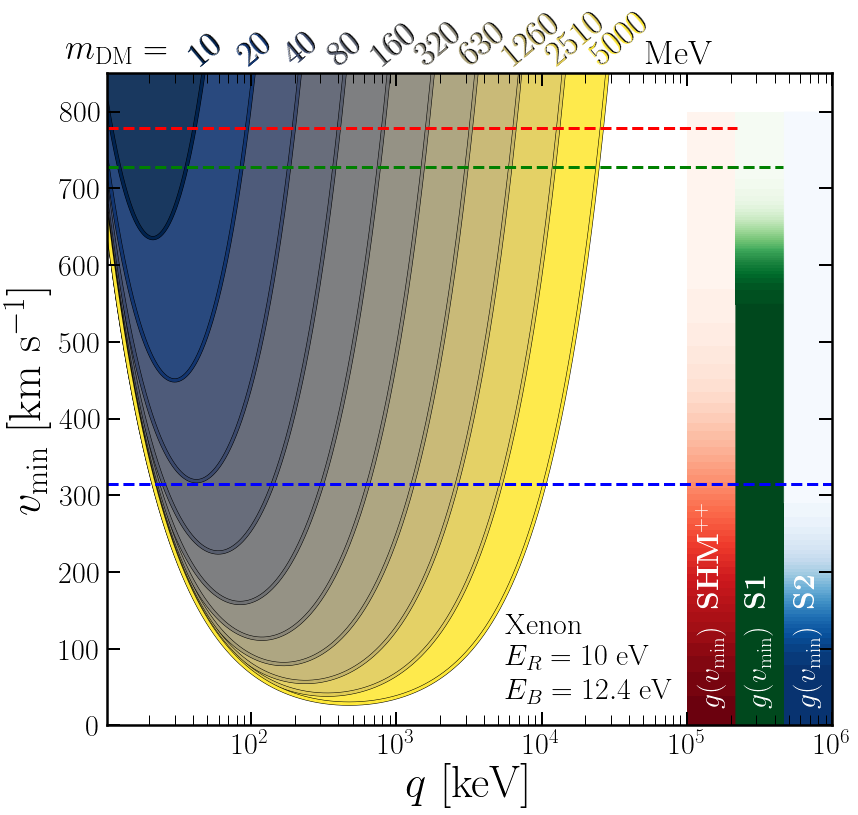

In [23]:
from matplotlib import cm

fig,ax = MySquarePlot(r'$q$ [keV]',r'$v_{\rm min}$ [km s$^{-1}$]',tfs=30)

nq1 = 5000
qvals = logspace(1.01,6,nq1)

mvals = logspace(log10(10.0),log10(5000.0),10)
col = cm.cividis(linspace(0.0,1.0,size(mvals)))
v0 = 1000.0
for i in range(0,size(mvals)):
    vmin_vals = vmin_ER(Xe131.BindingEnergies[0]/1000.0,10*1e-3,qvals,mvals[i])
    plt.fill_between(qvals,vmin_vals,y2=v0,color=col[i,:],lw=3,alpha=0.9)
    plt.plot(qvals,vmin_vals,color='k',lw=4,zorder=1)
    plt.plot(qvals,vmin_vals,color=col[i,:],lw=3,zorder=1)
    
    i1000 = arange(0,nq1)[vmin_vals<1000.0][-1]
    plt.text(qvals[i1000]*(1-0.39),861,str(int(ceil(mvals[i]/10.0)*10)),color='k',rotation=40,fontsize=35)
    plt.text(qvals[i1000]*(1-0.4),860,str(int(ceil(mvals[i]/10.0)*10)),color=col[i,:],rotation=40,fontsize=35)

    v0 = vmin_vals

ax.set_xscale('log')
  
G0 = tile(gmin0, (20,1))
cnt1=ax.contourf(logspace(log10(1e5),log10(1e5)+0.333,20),vmin,G0.T,50,cmap=cm.Reds)
for c in cnt1.collections:
    c.set_edgecolor("face")


G1 = tile(gmin_S1, (20,1))
cnt1=ax.contourf(logspace(log10(1e5)+0.333,log10(1e5)+0.666,20),vmin,G1.T,50,cmap=cm.Greens)
for c in cnt1.collections:
    c.set_edgecolor("face")

G2 = tile(gmin_S2, (20,1))
cnt1 = ax.contourf(logspace(log10(1e5)+0.666,log10(1e5)+1.0,20),vmin,G2.T,50,cmap=cm.Blues)
for c in cnt1.collections:
    c.set_edgecolor("face")


ax.set_ylim([0.0,850.0])
ax.set_xlim([qvals[0],qvals[-1]])

plt.plot([qvals[0],2.2e5],vmin[arange(0,nv)[gmin0>0.0][-1]]*array([1,1]),'--',lw=3,color='Red')
plt.plot([qvals[0],4.6e5],vmin[arange(0,nv)[gmin_S1>gmin_S1[0]/100.0][-1]]*array([1,1]),'--',lw=3,color='Green')
plt.plot([qvals[0],qvals[-1]],vmin[arange(0,nv)[gmin_S2>gmin_S2[0]/100.0][-1]]*array([1,1]),'--',lw=3,color='Blue')

plt.gcf().text(0.08,0.89,r'$m_{\rm DM} = $',fontsize=35)
plt.gcf().text(0.7,0.89,r'MeV',fontsize=35)

plt.text(1.2e5,30,r'$g(v_{\rm min})$',color='w',fontsize=30,rotation=90)
plt.text(2.53e5,30,r'$g(v_{\rm min})$',color='w',fontsize=30,rotation=90)
plt.text(5.5e5,30,r'$g(v_{\rm min})$',color='w',fontsize=30,rotation=90)

plt.text(1.2e5,160,r'{\bf SHM}$^{++}$',color='w',fontsize=30,rotation=90)
plt.text(2.53e5,160,r'{\bf S1}',color='w',fontsize=30,rotation=90)
plt.text(5.5e5,160,r'{\bf S2}',color='w',fontsize=30,rotation=90)

plt.gcf().text(0.55,0.23,r'Xenon',fontsize=30)
plt.gcf().text(0.55,0.19,r'$E_R = 10$ eV',fontsize=30)
plt.gcf().text(0.55,0.15,r'$E_B = 12.4$ eV',fontsize=30)

plt.show()
fig.savefig('../plots/vmin_vs_DMmass.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/vmin_vs_DMmass.png',bbox_inches='tight')